In [40]:
# Importing necessary libraries

import os
import pandas as pd
import numpy as np
import sklearn.preprocessing as preprocessing
import sklearn.cluster as cluster
from scipy.spatial.distance import cdist
import sklearn.metrics as metrics
import cluster_profiles as cluster_profiles
import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
data_dir = "N:\Datasets"

In [42]:
# Changing the current working directory to specified path

os.chdir(data_dir)

In [43]:
# Reading the dataset

data = pd.read_csv("kc_housingdata.csv")

In [44]:
# Returning top 5 rows of dataframe

data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [45]:
# Returning data type of columns present in dataframe

data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [46]:
# Choosing columns that are numeric and have a numeric interpretation

data_num = data[['price','bedrooms','bathrooms','sqft_living']]

In [47]:
data_num.dtypes

price          float64
bedrooms         int64
bathrooms      float64
sqft_living      int64
dtype: object

In [48]:
# Scaling the data, using pandas

def scale(x):
    return (x-np.mean(x))/np.std(x)

data_scaled = data_num.apply(scale,axis=0)

In [49]:
data_scaled.head()

,price,bedrooms,bathrooms,sqft_living
0,-0.866717,-0.398737,-1.447464,-0.979835
1,-0.005688,-0.398737,0.175607,0.533634
2,-0.980849,-1.473959,-1.447464,-1.426254
3,0.174090,0.676485,1.149449,-0.130550
4,-0.081958,-0.398737,-0.149007,-0.435422


In [50]:
# Scale the data using sklearn

dat_scaled = preprocessing.scale(data_num,axis = 0)

In [51]:
print(dat_scaled)
print("\nType of output is "+str(type(dat_scaled)))

[[-0.86671733 -0.39873715 -1.44746357 -0.97983502]
 [-0.00568792 -0.39873715  0.1756067   0.53363434]
 [-0.98084935 -1.47395936 -1.44746357 -1.42625404]
 ...
 [-0.37586519 -1.47395936 -1.77207762 -1.15404732]
 [-0.38158814 -0.39873715  0.50022075 -0.52252773]
 [-0.58588173 -1.47395936 -1.77207762 -1.15404732]]

Type of output is <class 'numpy.ndarray'>


In [52]:
print("Shape of the object is "+str(dat_scaled.shape))

Shape of the object is (21613, 4)


In [53]:
# Instantiating KMeans object

kmeans = cluster.KMeans(n_clusters = 3,init = "k-means++")

In [54]:
# Fitting the model

kmeans = kmeans.fit(dat_scaled)

In [55]:
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [56]:
# Returning labels of each point

kmeans.labels_

array([1, 0, 1, ..., 1, 0, 1])

In [57]:
# Returning coordinates of cluster centers
# These cluster centres are in 4 dimensional space because 4 variables were used to create the clusters

kmeans.cluster_centers_

array([[-0.02720601,  0.3660257 ,  0.37856337,  0.23743513],
       [-0.46297783, -0.71998061, -0.85664084, -0.78687793],
       [ 1.92515548,  1.08278584,  1.55478552,  1.94437578]])

In [58]:
# Creating Elbow plot when the number of clusters to consider isn't given

K = range(1,20)
wss = []
for k in K:
    # Build cluster model
    kmeans = cluster.KMeans(n_clusters = k,init = "k-means++")
    kmeans.fit(dat_scaled)
    # Extract the WSS 
    wss.append(sum(np.min(cdist(dat_scaled,kmeans.cluster_centers_,'euclidean'),axis = 1))/dat_scaled.shape[0])

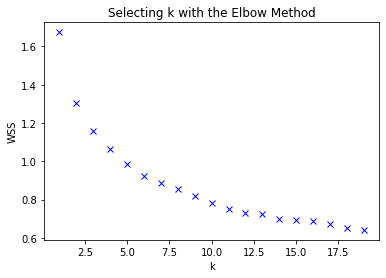

In [59]:
# Plotting elbow plot

plt.plot(K,wss,'bx')
plt.xlabel('k')
plt.ylabel('WSS')
plt.title('Selecting k with the Elbow Method')
plt.show()

In [60]:
# Flattens out around 8 clusters. So, choose 8 number of clusters

labels = cluster.KMeans(n_clusters = 8,random_state = 200).fit(dat_scaled).labels_

In [61]:
# Computing Silhoutte measure
# a value of Silhouette of around 1 represents good clustering 
# while a value of -1 represents suboptimal clustering.

metrics.silhouette_score(dat_scaled,labels,metric="euclidean",sample_size=10000,random_state=200)

0.28313345009707275

In [62]:
# Finding the Silhouette score for cluster models with 7 to 13 clusters

for i in range(7,13):
    labels=cluster.KMeans(n_clusters=i,random_state=200).fit(dat_scaled).labels_
    print("Silhouette score for k= "+str(i)+" is "+str(metrics.silhouette_score(dat_scaled,labels,metric="euclidean",
                                                                               sample_size=1000,random_state=200)))

Silhouette score for k= 7 is 0.2763712840436325
Silhouette score for k= 8 is 0.2903953376334379
Silhouette score for k= 9 is 0.28508536235309107
Silhouette score for k= 10 is 0.2806069718200512
Silhouette score for k= 11 is 0.27578365881372385
Silhouette score for k= 12 is 0.28154010556603204


In [63]:
# Silhouette score is maximum for 8 clusters. So, finalizing it

kmeans = cluster.KMeans(n_clusters = 8,random_state = 200).fit(dat_scaled)

In [64]:
# Creating cluster profiles

cluster_profiles.get_zprofiles(data=data_num.copy(),kmeans=kmeans)

,price,bedrooms,bathrooms,sqft_living,Size
Labels,,,,,
0,0.644691,0.344504,0.735787,0.992995,3132
1,-0.541668,-0.280571,-1.053502,-0.788342,4013
2,2.285528,0.922012,1.727444,2.194598,994
3,6.410548,1.250798,2.649467,3.697950,161
4,-0.494520,-1.571551,-1.211377,-1.073651,2445
5,0.278340,2.132508,1.031714,1.020664,1070
6,-0.203515,-0.493676,0.194295,-0.238244,5696
7,-0.263011,0.804906,0.129389,0.040654,4102
